In [1]:
#Importing gym environment
! pip install gym

In [2]:
#Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces
import time

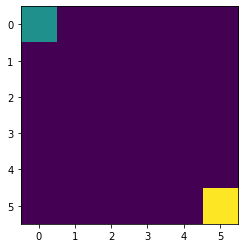

In [77]:
#Defining grid and start & terminal positions
grid  =  np.zeros((6,6))
start_pos = [0,0]
terminal_pos = [5, 5]
grid[tuple(terminal_pos)] = 4
grid[tuple(start_pos)] = 2
agent_pos = [0,0]
plt.imshow(grid)

In [78]:
#Creating class 
class Gridworld (gym.Env):
  def __init__(self):
    self.action_space = spaces.Discrete(4)
    self.observation_space = spaces.Discrete(25)
    self.max_timesteps = 25
    self.agent_pos = [0,0]
    self.start_pos = [0,0]
    self.terminal_pos = [5, 5]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,2]
    

  def step(self, action):
#Defining all the possible actions
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    if action == 4:
      self.agent_pos[1] += 1 
      self.agent_pos[0] += 1
    self.agent_pos = np.clip(self.agent_pos, 0, 5) 
    self.state = np.zeros((6,6))
#Defining the start and end positions for agent along with reward and penalty positions
#Assigning colors to agent position, terminal position, rewards and penalties
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.state[tuple(self.reward_pos_1)] = 0.2
    self.state[tuple(self.reward_pos_2)] = 0.3
    self.state[tuple(self.reward_pos_3)] = 0.4
    self.state[tuple(self.reward_pos_4)] = 0.7
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,2]
    self.reward_pos_3 = [2,5]
#Putting on the condition of number of time-steps on all the rewards and defining the reward values
    if (self.agent_pos == [5,4]).all():
      if (self.timesteps <= 15):
        self.reward = 15
    if (self.agent_pos == [3,3]).all():
      if (self.timesteps <= 15):
        self.reward = 35
    if (self.agent_pos == [2,2]).all():
      if (self.timesteps  <= 15):
        self.reward = 25
    if (self.agent_pos == [2,5]).all():
      if (self.timesteps  <= 15):
        self.reward = 10
#Defining and assigning terminal state reward   
    if (self.agent_pos == self.terminal_pos).all():
      if (self.timesteps  <= 20):
        self.reward = 45
      self.count += 1
#Defined the logic for movement of criminals with 30% chance of moving
    if (self.count % 3 == 0):
      prob_move = np.random.uniform(0,1)
      chance_move =  np.random.uniform(0,1)
      if chance_move > 0.7 :
        if prob_move > 0.5 :
          self.reward_pos_1[0] -= 1
        else :
          self.reward_pos_1[1] -= 1
    if (self.count % 2 == 0):
      prob_move = np.random.uniform(0,1)
      chance_move =  np.random.uniform(0,1)
      if chance_move > 0.7 :
        if prob_move > 0.5 :
          self.reward_pos_2[0] -= 1
        else :
          self.reward_pos_2[0] += 1
    return self.reward,self.agent_pos,self.count

  def render(self):
    plt.imshow(self.state)
  def reset(self):
    self.timesteps = 0
    self.agent_pos = [0, 0]
    self.reward_pos_1 = [5,4]
    self.reward_pos_2 = [3,3]
    self.reward_pos_3 = [2,5]
    self.reward_pos_4 = [2,2]
    self.terminal_pos = [5,5]
    self.state = np.zeros((6,6))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.terminal_pos)] = 0.5 
    self.state[tuple(self.reward_pos_1)] = 0.2
    self.state[tuple(self.reward_pos_2)] = 0.3
    self.state[tuple(self.reward_pos_3)] = 0.4
    self.state[tuple(self.reward_pos_4)] = 0.7
    observation = self.state.flatten()
    self.reward = 0
    self.count = 0
    self.trap = 0

    return observation




In [81]:
env = Gridworld()
obs = env.reset()
def Episodes_Q():
  env.reset()
  episode = {}
  episode[0] = [([0,0],0)]
  start_pos = [0,0]
  for i in range(1):   
     x = (start_pos == env.terminal_pos)
     while x == False :
        env.reward = 0
        action = np.random.randint(0,5)
        reward,position,c  = env.step(action)
        position = np.clip(position, 0, 5)
        episode[0].append((position,reward))
        if (position == env.terminal_pos).all():
          x = True
          break
  return episode
def Possible_Actions(current_s):
    next_states = []
    org_value = list(current_s)
    org_value[0] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[1] -= 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    org_value = list(current_s)
    org_value[0] += 1
    org_value[1] += 1
    org_value = np.clip(org_value, 0, 5) 
    next_states.append(list(org_value))
    return next_states
def start_q_values():
      final_q_table = {}
      for i in range(6):
          for j in range(6):
              final_q_table[(i,j)] = np.zeros(5)
      return final_q_table
def get_my_qvalue(q_table,given_state,r,e):
    if r > e:
        value = max(q_table.get(tuple(given_state[0])))
    else:
        rand_action = np.random.randint(0,5)
        value = q_table.get(tuple(given_state[0]))[rand_action]
    return value
    
def SARSA_learning():
  q_store = start_q_values()
  e = 0.6
  plot_reward = []
  epsilon = []
  for i in range(2000):
      for_graph = 0
      episode = Episodes_Q()
      e = e * 0.999
      for i in range(len(episode[0])-1):
       # if np.array(episode[0][index])  != np.array([0,0]):
            threshold = np.random.uniform(0,1)
            #print(episode[0][i])          
            if  (list(episode[0][i][0]) != env.terminal_pos):
                old_value_q = get_my_qvalue(q_store,episode[0][i],threshold,e)
                action = q_store.get(tuple(episode[0][i][0])).tolist().index(old_value_q)
            else:
                old_value_q = 0
                action = 0
            #old_value_q = q_store.get((tuple(episode[0][i][0])))[action]
            threshold = np.random.uniform(0,1)
            if (episode[0][i+1][0] != env.terminal_pos).all():
                q_new = get_my_qvalue(q_store,episode[0][i+1],threshold,e)
            else:
                q_new = 0
            latest_reward = episode[0][i+1][1]
            for_graph += latest_reward
            alpha = 0.2
            gamma = 0.7
            new_value_q = old_value_q + alpha*(latest_reward + gamma*(q_new) - old_value_q )
            q_store[tuple(episode[0][i][0])][action] = new_value_q
      plot_reward.append(for_graph)
      epsilon.append(e)
     
  return q_store, plot_reward, epsilon
        
finaltable, reward_graph, decay = SARSA_learning()
optimal = finaltable.values()
def get_max():
   action = []
   state = []
   for item in finaltable.items():
       action.append(tuple(item[1]).index(max(tuple(item[1]))))
   return action

optimal_action = get_max()
print(optimal_action)





[0, 4, 2, 0, 1, 0, 4, 4, 4, 4, 3, 1, 3, 0, 4, 1, 0, 4, 3, 0, 3, 3, 3, 4, 0, 2, 4, 1, 2, 3, 3, 2, 1, 4, 1, 0]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

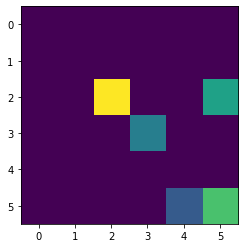

<IPython.core.display.Javascript object>

9
45


In [83]:
env = Gridworld()
obs = env.reset()
cumulative = 0
from google.colab import widgets
output_grid = widgets.Grid(1,1)
for i in range(len(optimal_action)):
  action = optimal_action[i]
  grid = np.zeros((6,6))
  reward,position,count  = env.step(action)
  cumulative += reward
  env.timesteps += 1
  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    env.render()
  time.sleep(0.5)
  if (position == terminal_pos).all():
    break 
print(env.timesteps)
print(reward)

[125, 80, 230, 115, 160, 115, 140, 110, 135, 70, 70, 135, 55, 135, 135, 175, 235, 120, 135, 155, 215, 100, 95, 135, 80, 55, 65, 60, 140, 55, 60, 115, 55, 45, 110, 60, 60, 95, 120, 60, 185, 90, 85, 225, 175, 190, 55, 115, 75, 165, 115, 95, 130, 85, 250, 265, 195, 110, 160, 95, 260, 120, 105, 85, 55, 195, 125, 330, 140, 210, 75, 90, 135, 95, 105, 270, 120, 120, 105, 55, 105, 75, 65, 60, 145, 235, 170, 80, 100, 265, 120, 180, 120, 105, 130, 145, 120, 110, 70, 125, 160, 45, 85, 130, 100, 170, 260, 160, 75, 60, 120, 95, 225, 60, 125, 90, 55, 190, 65, 95, 140, 145, 110, 45, 45, 240, 85, 105, 130, 155, 185, 75, 125, 70, 75, 180, 55, 160, 135, 45, 120, 75, 115, 115, 95, 70, 115, 85, 165, 215, 120, 135, 60, 110, 120, 90, 260, 105, 210, 75, 60, 115, 90, 90, 120, 145, 150, 130, 85, 80, 135, 65, 60, 45, 150, 135, 105, 180, 135, 90, 110, 105, 85, 75, 80, 85, 120, 250, 45, 75, 65, 60, 45, 105, 150, 255, 140, 85, 75, 170, 120, 45, 60, 165, 105, 85, 70, 80, 155, 60, 45, 150, 110, 70, 105, 245, 420, 75

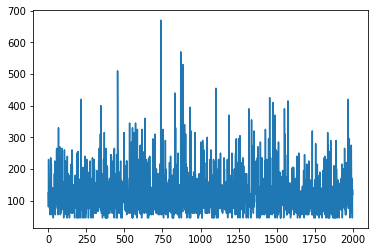

In [85]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(2000), reward_graph)
print(reward_graph)



[0.29969999999999997, 0.29940029999999995, 0.2991008997, 0.2988017988003, 0.2985029970014997, 0.29820449400449817, 0.2979062895104937, 0.2976083832209832, 0.29731077483776225, 0.2970134640629245, 0.2967164505988616, 0.2964197341482627, 0.29612331441411444, 0.29582719109970035, 0.29553136390860063, 0.29523583254469205, 0.29494059671214734, 0.2946456561154352, 0.2943510104593198, 0.29405665944886045, 0.2937626027894116, 0.29346884018662217, 0.29317537134643556, 0.29288219597508913, 0.29258931377911407, 0.29229672446533495, 0.2920044277408696, 0.29171242331312874, 0.29142071088981564, 0.2911292901789258, 0.29083816088874687, 0.2905473227278581, 0.29025677540513023, 0.2899665186297251, 0.2896765521110954, 0.2893868755589843, 0.28909748868342533, 0.2888083911947419, 0.28851958280354717, 0.2882310632207436, 0.28794283215752287, 0.2876548893253653, 0.28736723443603995, 0.2870798672016039, 0.2867927873344023, 0.2865059945470679, 0.28621948855252083, 0.2859332690639683, 0.28564733579490437, 0.2

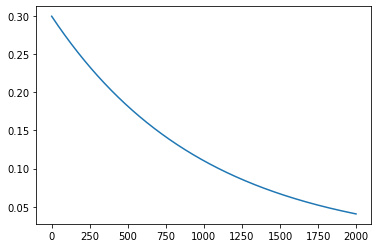

In [74]:
plt.plot(range(2000), decay)
print(decay)